# Structure vs Surprise in Lana Del Rey Lyrics

This notebook demonstrates how engineered linguistic features are loaded
and explored for songs from *Born to Die* and *Norman Fucking Rockwell!*.
Full feature engineering, machine learning methods, and interpretations
are documented in the README and implemented in the `lanastance` package.

In [3]:
from sklearn.neighbors import NearestNeighbors

features = df[
    ["repetition_rate", "lexical_entropy", "first_person_rate"]
]

nn = NearestNeighbors(n_neighbors=3, metric="euclidean")
nn.fit(features)

distances, indices = nn.kneighbors(features)

# Show nearest neighbors for each song
for i, song in enumerate(df["song"]):
    neighbors = indices[i][1:]  # exclude itself
    neighbor_songs = df.iloc[neighbors][["song", "album"]]
    print(f"\n{song} → nearest neighbors:")
    print(neighbor_songs.to_string(index=False))



aka_lizzy_grant_brite_lites.txt → nearest neighbors:
                           song           album
aka_lizzy_grant_raise_me_up.txt aka_lizzy_grant
              born_to_die_radio     born_to_die

aka_lizzy_grant_for_K_part_2.txt → nearest neighbors:
                          song         album
               nfr_venice_btch           nfr
lust_for_life_groupie_love.txt lust_for_life

aka_lizzy_grant_gramma.txt → nearest neighbors:
                             song           album
aka_lizzy_grant_mermaid_motel.txt aka_lizzy_grant
               born_to_die_lolita     born_to_die

aka_lizzy_grant_jump.txt → nearest neighbors:
                  song         album
    ariel_the_couriers         ariel
lust_for_life_love.txt lust_for_life

aka_lizzy_grant_kill_kill.txt → nearest neighbors:
                                                                 song                                album
                                      ultraviolence_brooklyn_baby.txt                        ult

In [1]:
import pandas as pd

df = pd.read_csv("../data/features/song_features.csv")
df.head()

,lexical_entropy,line_end_similarity,third_person_rate,album,song,second_person_rate,repetition_rate,first_person_rate
0,4.4643,0.8409,0.000,aka_lizzy_grant,aka_lizzy_grant_brite_lites.txt,20.408,0.7045,183.673
1,5.8875,0.4500,0.000,aka_lizzy_grant,aka_lizzy_grant_for_K_part_2.txt,120.000,0.2000,93.333
2,5.6428,0.6333,0.000,aka_lizzy_grant,aka_lizzy_grant_gramma.txt,28.302,0.5167,106.132
3,5.0361,0.5143,9.901,aka_lizzy_grant,aka_lizzy_grant_jump.txt,133.663,0.4571,24.752
4,5.0833,0.6286,4.630,aka_lizzy_grant,aka_lizzy_grant_kill_kill.txt,32.407,0.5714,134.259


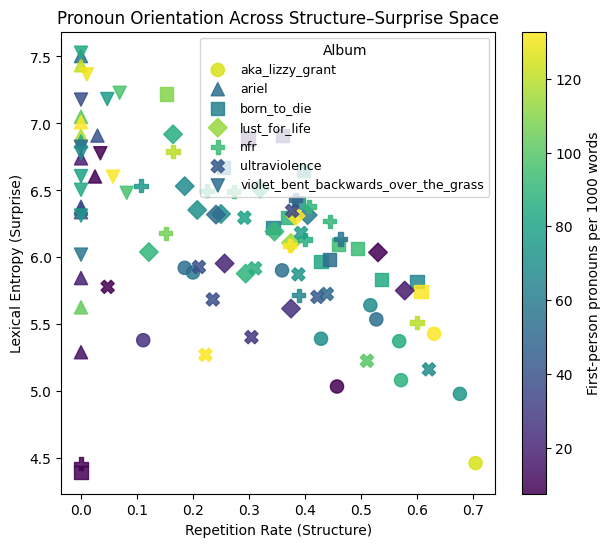

In [4]:
import matplotlib.pyplot as plt
import itertools

plt.figure(figsize=(7, 6))

albums = df["album"].unique()

# A cycle of marker styles (will reuse if albums > markers)
marker_cycle = itertools.cycle([
    "o",  # circle
    "^",  # triangle up
    "s",  # square
    "D",  # diamond
    "P",  # plus filled
    "X",  # x filled
    "v",  # triangle down
    "<",  # triangle left
    ">"   # triangle right
])

for album in albums:
    marker = next(marker_cycle)
    sub = df[df["album"] == album]

    scatter = plt.scatter(
        sub["repetition_rate"],
        sub["lexical_entropy"],
        c=sub["first_person_rate"],
        cmap="viridis",
        s=90,
        alpha=0.85,
        marker=marker,
        label=album
    )

plt.colorbar(scatter, label="First-person pronouns per 1000 words")
plt.xlabel("Repetition Rate (Structure)")
plt.ylabel("Lexical Entropy (Surprise)")
plt.title("Pronoun Orientation Across Structure–Surprise Space")
plt.legend(title="Album", fontsize=9)
plt.show()


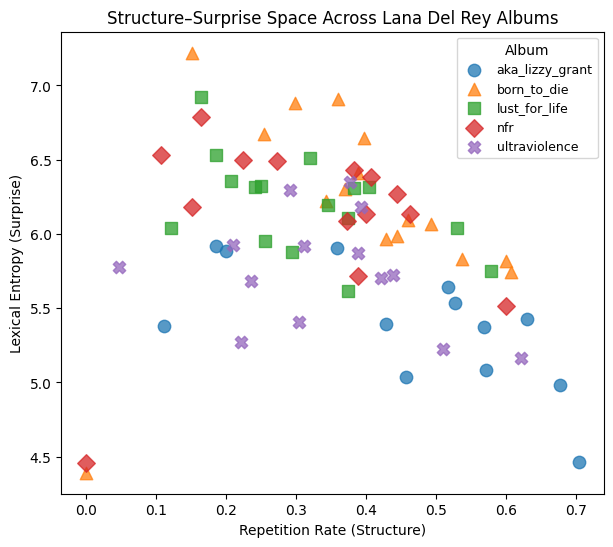

In [5]:
plt.figure(figsize=(7, 6))

song_albums = df[~df["album"].isin([
    "ariel",
    "violet_bent_backwards_over_the_grass"
])]

albums = song_albums["album"].unique()

for album, marker in zip(albums, ["o", "^", "s", "D", "X", "P"]):
    sub = song_albums[song_albums["album"] == album]
    plt.scatter(
        sub["repetition_rate"],
        sub["lexical_entropy"],
        alpha=0.75,
        s=80,
        marker=marker,
        label=album
    )

plt.xlabel("Repetition Rate (Structure)")
plt.ylabel("Lexical Entropy (Surprise)")
plt.title("Structure–Surprise Space Across Lana Del Rey Albums")
plt.legend(title="Album", fontsize=9)
plt.show()


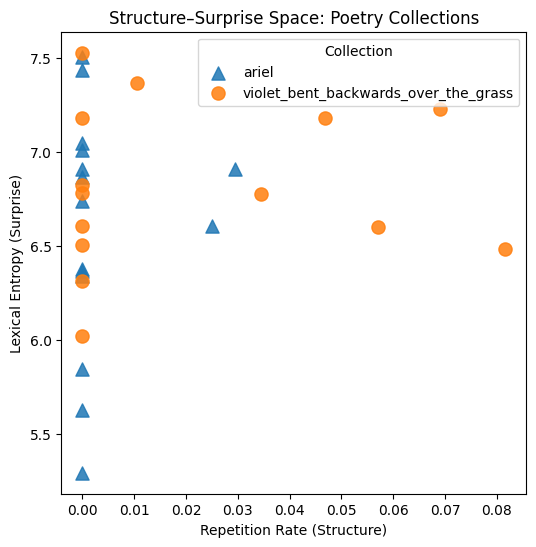

In [6]:
plt.figure(figsize=(6, 6))

poetry = df[df["album"].isin([
    "ariel",
    "violet_bent_backwards_over_the_grass"
])]

for album, marker in zip(poetry["album"].unique(), ["^", "o"]):
    sub = poetry[poetry["album"] == album]
    plt.scatter(
        sub["repetition_rate"],
        sub["lexical_entropy"],
        s=90,
        alpha=0.85,
        marker=marker,
        label=album
    )

plt.xlabel("Repetition Rate (Structure)")
plt.ylabel("Lexical Entropy (Surprise)")
plt.title("Structure–Surprise Space: Poetry Collections")
plt.legend(title="Collection")
plt.show()
